In [1]:
import csv 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random 
import matplotlib.colors as mcolors
from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler

In [2]:
sns.set('talk')

## Data extraction

,residue name,position,chain,phi,psi
0,LYS,10,A,-149.312855,142.657714
1,PRO,11,A,-44.283210,136.002076
2,LYS,12,A,-119.972621,-168.705263
3,LEU,13,A,-135.317212,137.143523
4,LEU,14,A,-104.851467,95.928520
...,...,...,...,...,...
29364,GLY,374,B,-147.749557,155.223562
29365,GLN,375,B,-117.428541,133.019506
29366,ILE,376,B,-113.586448,112.091970
29367,ASN,377,B,-100.668779,-12.102821


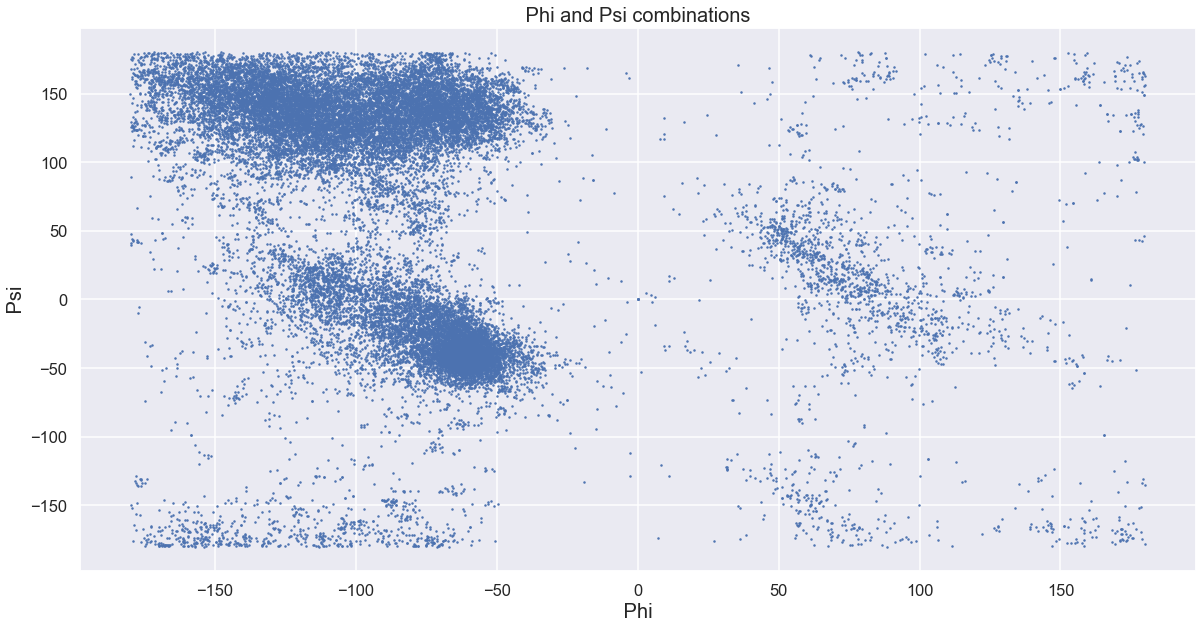

In [3]:
with open('data_all.csv',newline='') as f:         #Ouverture du fichier CSV
    tableau=[]
    lire=csv.reader(f)                            #chargement des lignes du fichier csv
    print('',end='\n')
    for ligne in lire:                            #Pour chaque ligne... 
        #print(ligne, end='\n')                    #...affichage de la ligne dans la console ...
        tableau.append(ligne)                     #...on ajoute la ligne dans la liste ...
df=pd.read_csv('data_all.csv')

fig,ax = plt.subplots(1, 1, figsize=(20, 10))

plt.scatter(df['phi'],df['psi'],s=1)
#ax.scatter(df['phi'],df['psi'],color=color)
ax.set_title(" Phi and Psi combinations ",fontsize=20)
ax.set_xlabel(" Phi ",fontsize=20)
ax.set_ylabel(" Psi ",fontsize=20);

df

# Part 1 - 2 

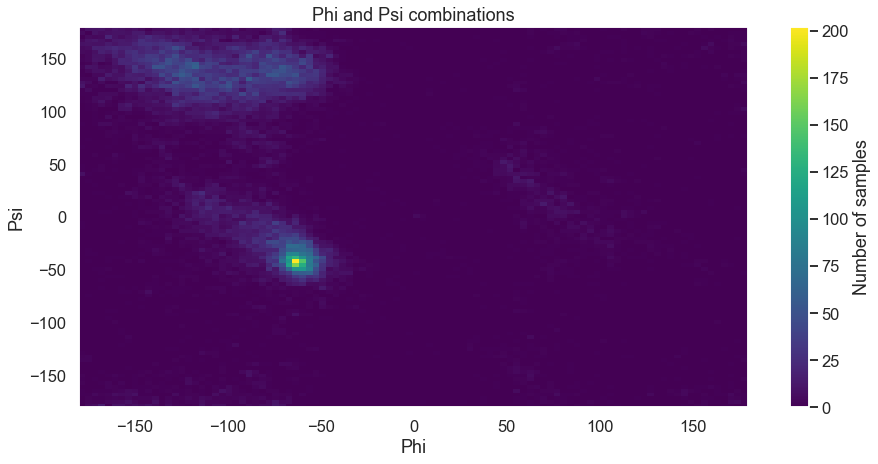

In [4]:
#HeatMap

# Set size of the figure
plt.figure(figsize=(15, 7))
# Plot 2D histogram from X
# We can choose different colormaps (i.e., viridis, plasma, inferno, magma, cividis).
plt.hist2d(df['phi'], df['psi'], bins=100, cmap='viridis')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of samples')

# Add title and labels to plot.
plt.xlabel("Phi")
plt.ylabel("Psi")
plt.title('Phi and Psi combinations')

# Show the plot.
plt.show()


In [5]:


Kmeans_data=df[['phi','psi']]
Kmeans_data=Kmeans_data.values.astype('float32',copy=False)

In [6]:
# Specify the number of clusters (3!!) and fit the data X

kmeans = KMeans(n_clusters=3, random_state=0).fit(Kmeans_data)

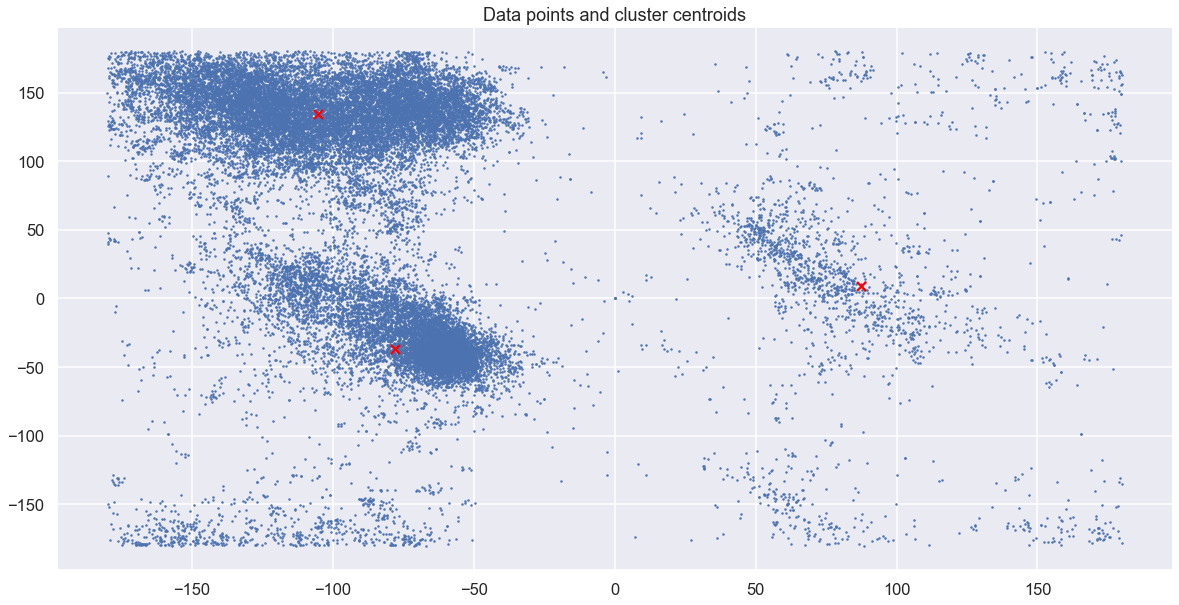

In [7]:
# Scatter + Centroids
fig,ax = plt.subplots(1, 1, figsize=(20, 10))
plt.scatter(df['phi'],df['psi'],s=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.title('Data points and cluster centroids')
plt.show()

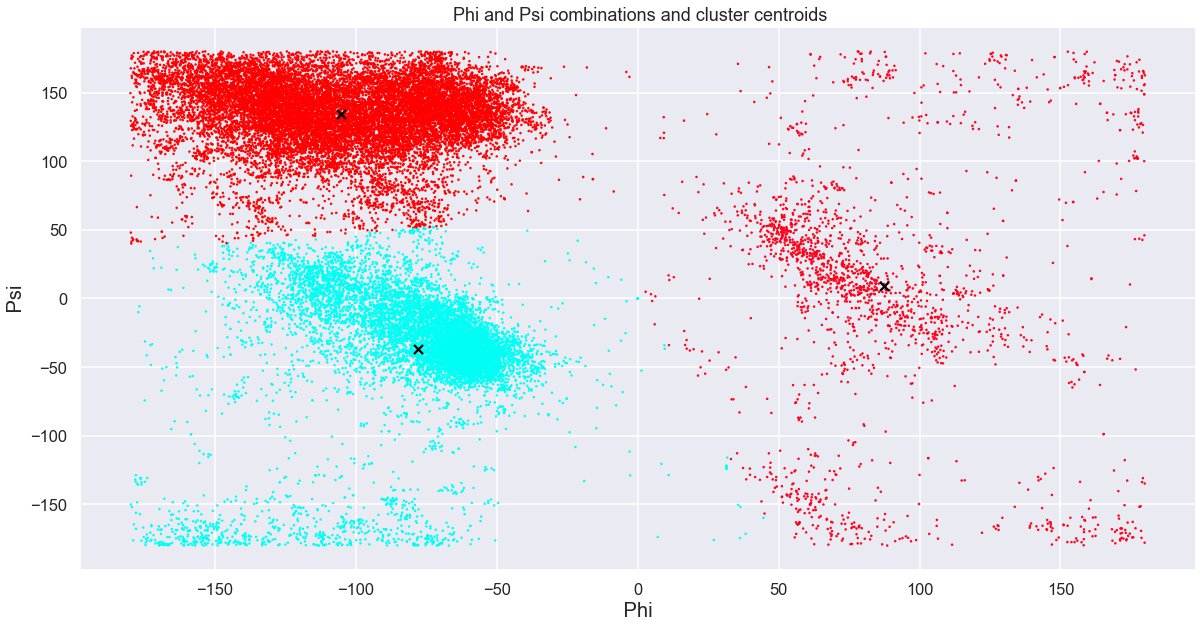

In [8]:
# Kmeans vizualisation
fig,ax = plt.subplots(1, 1, figsize=(20, 10))
ax.scatter(df['phi'],df['psi'],s=1,c=kmeans.labels_,cmap="hsv")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x')
ax.set_xlabel(" Phi ",fontsize=20)
ax.set_ylabel(" Psi ",fontsize=20);
plt.title(' Phi and Psi combinations and cluster centroids')
plt.show()

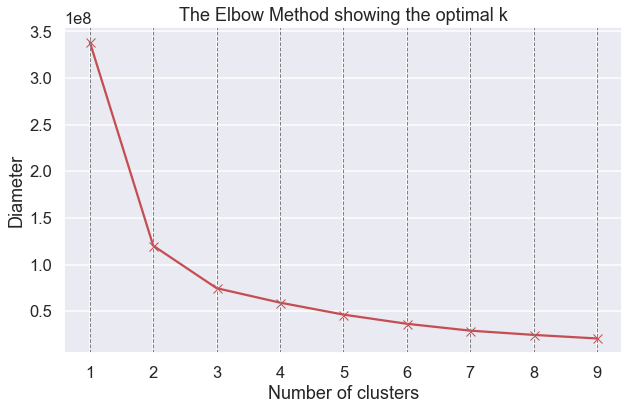

In [9]:
#Elbow method

distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Kmeans_data)
    distortions.append(kmeanModel.inertia_)
    
fig,ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(K, distortions, 'rx-')
for k in K:
    ax.axvline(k,color='gray',linestyle='--',lw=1)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Diameter')
ax.set_title('The Elbow Method showing the optimal k');


# DB SCAN Part


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29369 entries, 0 to 29368
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   residue name  29369 non-null  object 
 1   position      29369 non-null  int64  
 2   chain         29369 non-null  object 
 3   phi           29369 non-null  float64
 4   psi           29369 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.1+ MB


In [11]:
#Construction of the DBSCAN Dataset
dbscan_data=df[['phi','psi']]
dbscan_data=dbscan_data.values.astype('float32',copy=False)


In [12]:
# Scaling Process
dbscan_data_scaler=StandardScaler().fit(dbscan_data)
dbscan_data=dbscan_data_scaler.transform(dbscan_data)
dbscan_data

array([[-1.1777204 ,  0.86048543],
       [ 0.66984934,  0.7874413 ],
       [-0.6615983 , -2.556653  ],
       ...,
       [-0.5492596 ,  0.52503335],
       [-0.32202563, -0.8379765 ],
       [-1.540769  ,  0.3290426 ]], dtype=float32)

In [13]:
# DBSCAN Initialisation

db = DBSCAN(eps=0.25, min_samples=250).fit(dbscan_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

a=np.unique(labels,return_counts=True)
a[1]

DBSCAN(eps=0.25, min_samples=250)
Estimated number of clusters: 3
Estimated number of noise points: 2329


array([ 2329, 16732,  9491,   817], dtype=int64)

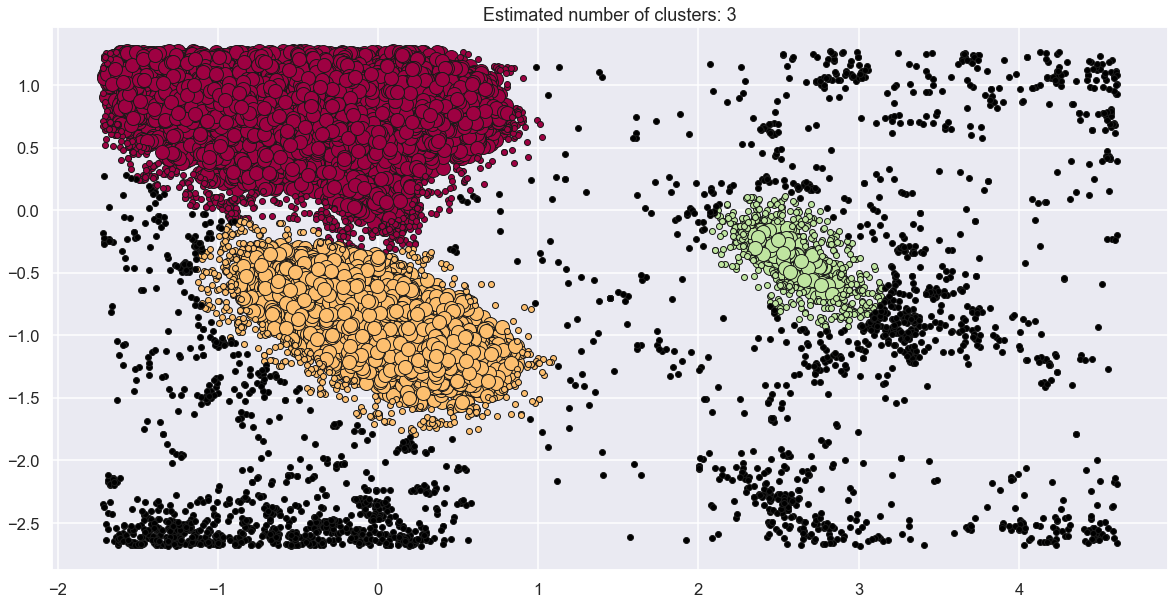

In [14]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
fig,ax5 = plt.subplots(1, 1, figsize=(20, 10))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = dbscan_data[class_member_mask & core_samples_mask]
    ax5.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = dbscan_data[class_member_mask & ~core_samples_mask]
    ax5.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Counter({0: 16732, 1: 9491, -1: 2329, 2: 817})
   residue name  position chain         phi         psi
2           LYS        12     A -119.972621 -168.705263
9           GLY        19     A   93.478288  -26.252796
22          ASP        32     A -160.454189 -154.096149
40          SER        50     A -161.204538 -149.176086
56          ALA        66     A -142.535175 -144.336013
The number of clusters is equal to :  3


GLY    1027
SER     205
ASN     156
ASP     154
GLU      93
THR      92
ALA      81
TYR      73
VAL      66
LYS      56
ARG      56
HIS      48
GLN      39
PHE      36
LEU      33
CYS      31
ILE      30
TRP      21
PRO      20
MET      12
Name: residue name, dtype: int64

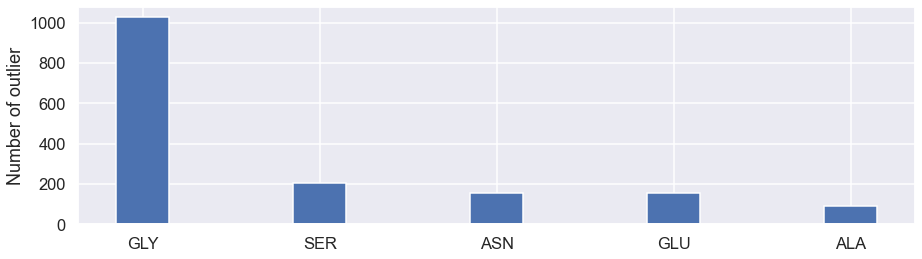

In [15]:
outliers_df =df[db.labels_==-1]
cluster_df = df[db.labels_!=1]

unique_labels = set(db.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

clusters= Counter(db.labels_)
print(clusters)
print(df[db.labels_==-1].head())
print('The number of clusters is equal to : ', (len(clusters)-1))

result= outliers_df['residue name'].unique()


labels = ['GLY', 'SER', 'ASN', 'GLU', 'ALA']
a= outliers_df['residue name'].value_counts()
fig,ax2=plt.subplots(1, 1, figsize=(15, 4))
ax2.bar(labels, a[:5], 0.3,label ='Residue Name') 
ax2.set_ylabel("Number of outlier")

a

In [16]:
val_stock=[]
variations= [250,240,230,220,210]
ncluster=[]
for i in range (len(variations)):
    db = DBSCAN(eps=0.22, min_samples=variations[i]).fit(dbscan_data)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    a=np.unique(labels,return_counts=True)
    val_stock.append(a[1])
    ncluster.append(n_clusters_)


In [17]:
cluster_0=[]
cluster_1=[]
cluster_2=[]
nb_cluster=[]
outlier=[]

for i in range (len(val_stock)):
    cluster_0.append(val_stock[i][1])
    cluster_1.append(val_stock[i][2])
    cluster_2.append(val_stock[i][3])
    outlier.append(val_stock[i][0])
    
        
dataFrameG=np.vstack((variations, ncluster,cluster_0,cluster_1,cluster_2,outlier))
Test=np.transpose(dataFrameG)
columns = ['MinPts','Nb Cluster','Nb points in cluster 0 ','Nb points in cluster 1','Nb points in cluster 2','Nb outliers']
dg = pd.DataFrame(data=Test,columns=columns)


dg

,MinPts,Nb Cluster,Nb points in cluster 0,Nb points in cluster 1,Nb points in cluster 2,Nb outliers
0,250,3,16602,9401,638,2728
1,240,3,16617,9408,688,2656
2,230,3,16628,9415,726,2600
3,220,3,16637,9425,752,2555
4,210,3,16656,9429,778,2506


In [18]:
ncluster=[]
b=np.linspace(0.19,0.25,5)
for i in range (len(b)):
    db = DBSCAN(eps=b[i], min_samples=250).fit(dbscan_data)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    a=np.unique(labels,return_counts=True)
    val_stock.append(a[1])
    ncluster.append(n_clusters_)

In [19]:
cluster_0=[]
cluster_1=[]
cluster_2=[]
nb_cluster=[]
outlier=[]

for i in range (len(b)):
    print(len(val_stock[i]))
    
        
    cluster_0.append(val_stock[i][1])
    cluster_1.append(val_stock[i][2])
    outlier.append(val_stock[i][0]) 
    if (len(val_stock[i])>=4):
        cluster_2.append(val_stock[i][3])
    else : 
        cluster_2.append('No Cluster')
        
    
        
dataFrameG=np.vstack(( b,ncluster,cluster_0,cluster_1,cluster_2,outlier))
Test=np.transpose(dataFrameG)
columns = ['eps_value','Nb Cluster','Nb points in cluster 0 ','Nb points in cluster 1','Nb points in cluster 2','Nb outliers']
dg2 = pd.DataFrame(data=Test,columns=columns)


dg2

4
4
4
4
4


,eps_value,Nb Cluster,Nb points in cluster 0,Nb points in cluster 1,Nb points in cluster 2,Nb outliers
0,0.190,2.0,16602.0,9401.0,638.0,2728.0
1,0.205,3.0,16617.0,9408.0,688.0,2656.0
2,0.220,3.0,16628.0,9415.0,726.0,2600.0
3,0.235,3.0,16637.0,9425.0,752.0,2555.0
4,0.250,3.0,16656.0,9429.0,778.0,2506.0


In [20]:
val_stock

[array([ 2728, 16602,  9401,   638], dtype=int64),
 array([ 2656, 16617,  9408,   688], dtype=int64),
 array([ 2600, 16628,  9415,   726], dtype=int64),
 array([ 2555, 16637,  9425,   752], dtype=int64),
 array([ 2506, 16656,  9429,   778], dtype=int64),
 array([ 3882, 16260,  9227], dtype=int64),
 array([ 3295, 16465,  9315,   294], dtype=int64),
 array([ 2728, 16602,  9401,   638], dtype=int64),
 array([ 2502, 16659,  9453,   755], dtype=int64),
 array([ 2329, 16732,  9491,   817], dtype=int64)]

# Question 4 

In [21]:
PRO = df.loc[(df["residue name"]=="PRO")]
GLY = df.loc[(df["residue name"]=="GLY")]

((2176, 2), (1596, 2))

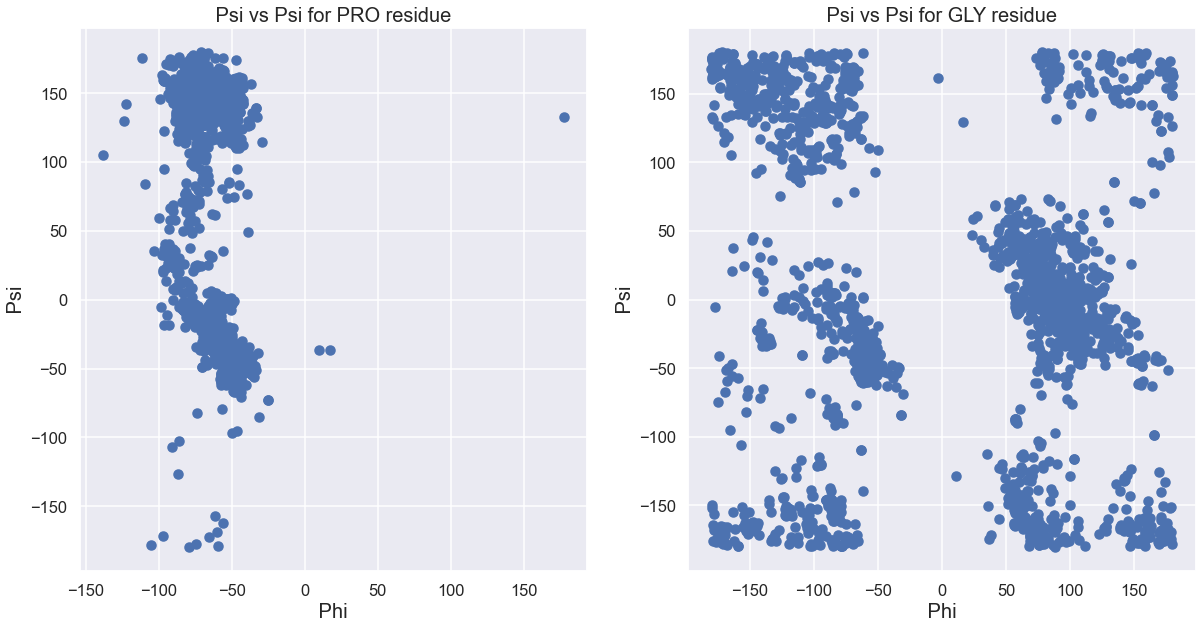

In [22]:
dbscan_dataP=PRO[['phi','psi']]
dbscan_dataP=dbscan_dataP.values.astype('float32',copy=False)

fig,ax3 = plt.subplots(1, 2, figsize=(20, 10))
ax3[0].scatter(PRO['phi'],PRO['psi'])
ax3[1].scatter(GLY['phi'],GLY['psi'])

ax3[0].set_xlabel(" Phi ",fontsize=20)
ax3[0].set_ylabel(" Psi ",fontsize=20);
ax3[0].set_title(" Psi vs Psi for PRO residue ",fontsize=20);

ax3[1].set_xlabel(" Phi ",fontsize=20)
ax3[1].set_ylabel(" Psi ",fontsize=20);
ax3[1].set_title(" Psi vs Psi for GLY residue ",fontsize=20);

dbscan_dataG=GLY[['phi','psi']]
dbscan_dataG=dbscan_dataG.values.astype('float32',copy=False)
dbscan_dataG.shape,dbscan_dataP.shape

In [23]:
dbscan_data_scalerP=StandardScaler().fit(dbscan_dataP)
dbscan_dataP=dbscan_data_scalerP.transform(dbscan_dataP)

dbscan_data_scalerG=StandardScaler().fit(dbscan_dataG)
dbscan_dataG=dbscan_data_scalerG.transform(dbscan_dataG)




In [24]:
# Pro 
dbP = DBSCAN(eps=0.5, min_samples=100).fit(dbscan_dataP)
core_samples_mask = np.zeros_like(dbP.labels_, dtype=bool)
core_samples_mask[dbP.core_sample_indices_] = True
labels = dbP.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

DBSCAN(eps=0.25, min_samples=250)
Estimated number of clusters: 2
Estimated number of noise points: 128


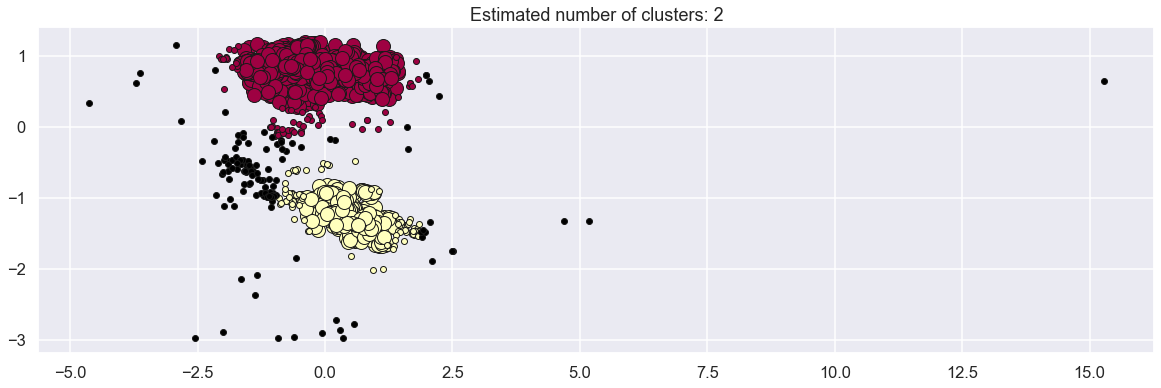

In [25]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

fig,ax4 = plt.subplots(1, 1, figsize=(20, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = dbscan_dataP[class_member_mask & core_samples_mask]
    ax4.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = dbscan_dataP[class_member_mask & ~core_samples_mask]
    ax4.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [26]:
dbG = DBSCAN(eps=0.30, min_samples=100).fit(dbscan_dataG)
core_samples_mask = np.zeros_like(dbG.labels_, dtype=bool)
core_samples_mask[dbG.core_sample_indices_] = True
labels = dbG.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

DBSCAN(eps=0.25, min_samples=250)
Estimated number of clusters: 5
Estimated number of noise points: 377


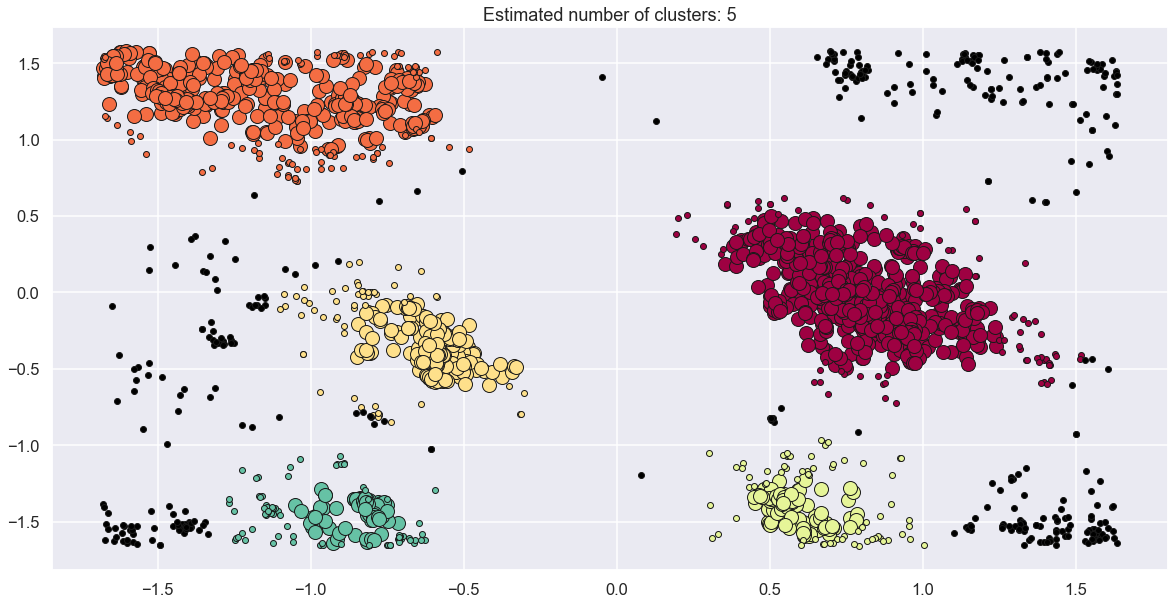

In [27]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

fig,ax4 = plt.subplots(1, 1, figsize=(20, 10))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = dbscan_dataG[class_member_mask & core_samples_mask]
    ax4.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = dbscan_dataG[class_member_mask & ~core_samples_mask]
    ax4.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()